In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [56]:
df1 = pd.read_csv('/home/sasidharreddy/stuff/OELP_sem6/additional_features/data.csv')
df=df1
df.to_csv('new_output_file.csv', index=False)
df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))
df = df.drop(['idates', 'imonths', 'iyears'], axis=1)
df.to_csv('output_file.csv', index=False)

df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [57]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,pvar21,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,287.904816,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,286.894318,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,286.598755,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,287.291229,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,288.210236,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203


In [58]:
df1

,idates,imonths,iyears,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,...,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30,datetime
0,2007,1,6,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,...,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053,2007-01-06
1,2007,1,7,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,...,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903,2007-01-07
2,2007,1,8,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,...,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587,2007-01-08
3,2007,1,9,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,...,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028,2007-01-09
4,2007,1,10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,...,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203,2007-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2020,12,27,0.0,0.0,0.0,292.349579,0.0,-0.134501,-0.330605,...,22.601984,10.075965,2.845399,0.002192,0.037210,0.033872,5.044056,2.544335,-2.367390,2020-12-27
4994,2020,12,28,0.0,0.0,0.0,292.926605,0.0,-0.558952,-0.205444,...,24.928835,15.007801,1.083511,-0.024991,0.016587,0.048118,10.108992,4.334765,-2.106347,2020-12-28
4995,2020,12,29,0.0,0.0,0.0,294.176666,0.0,-1.051628,0.059863,...,22.123894,13.816175,-1.325656,0.015454,-0.000724,-0.059172,19.665627,3.174320,-1.200928,2020-12-29
4996,2020,12,30,0.0,0.0,0.0,294.178894,0.0,-1.039607,-0.103797,...,25.638474,10.111415,-0.586587,0.018174,0.060805,-0.065860,18.872049,5.432332,-1.850764,2020-12-30


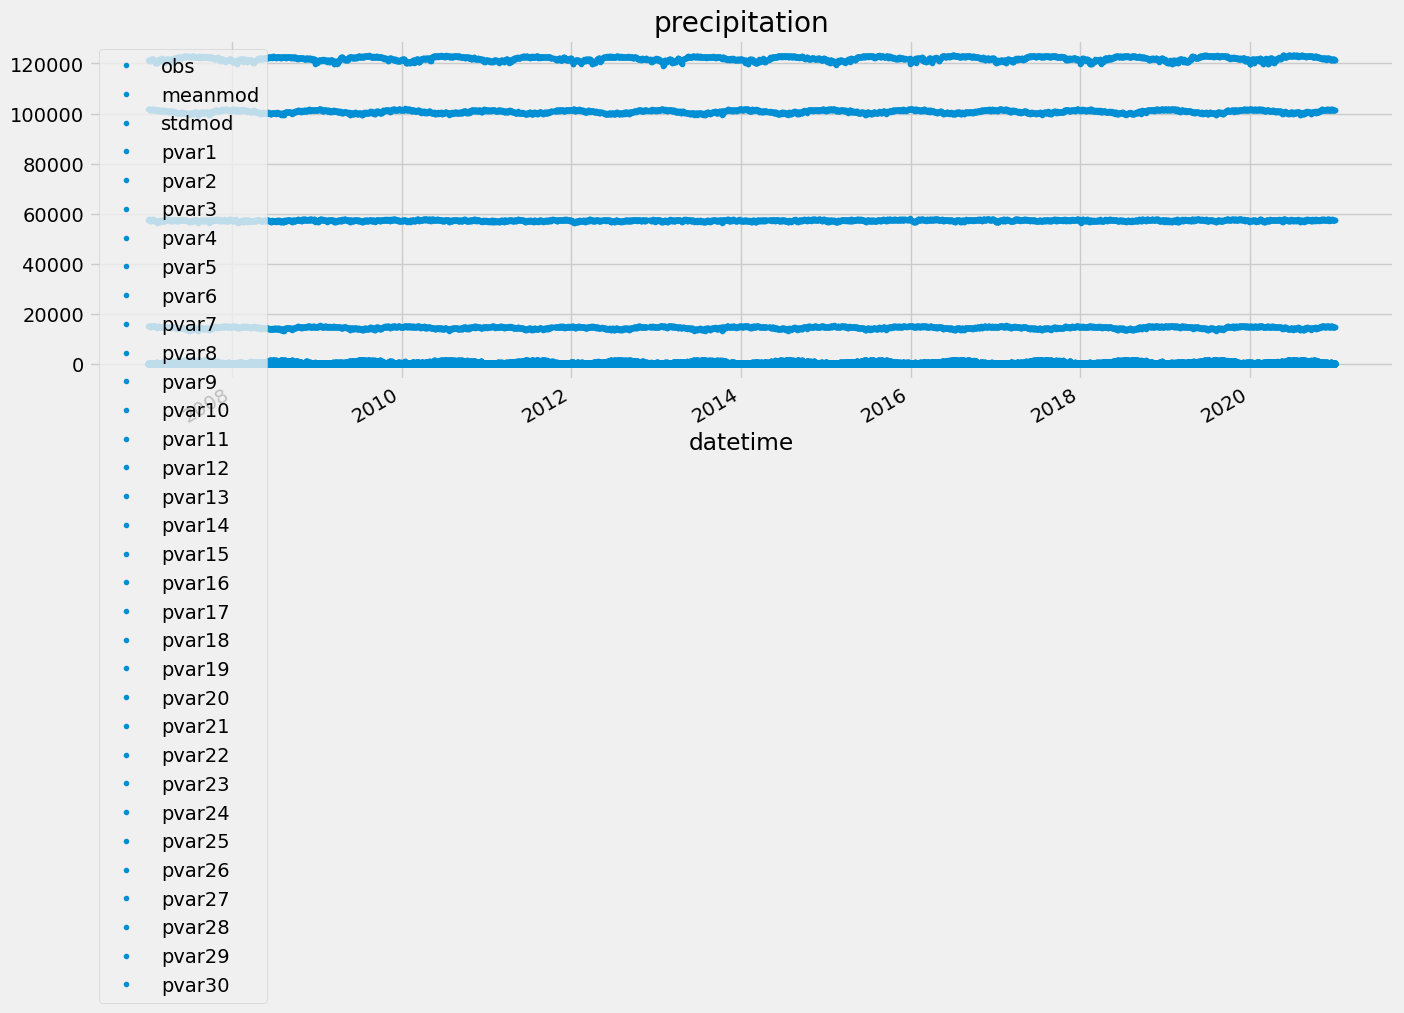

In [59]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

<AxesSubplot:ylabel='Frequency'>

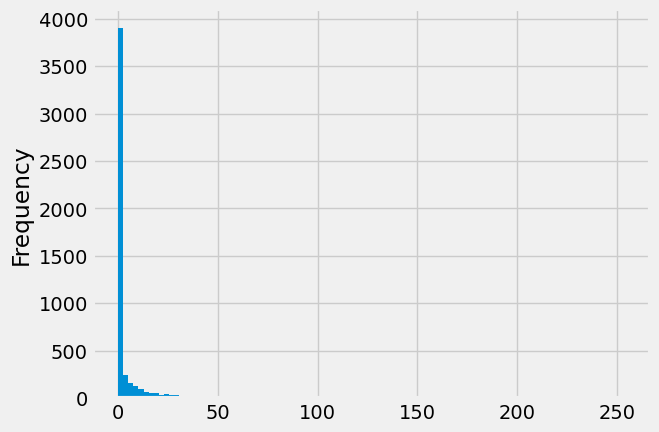

In [60]:
df['obs'].plot(kind='hist', bins=100)

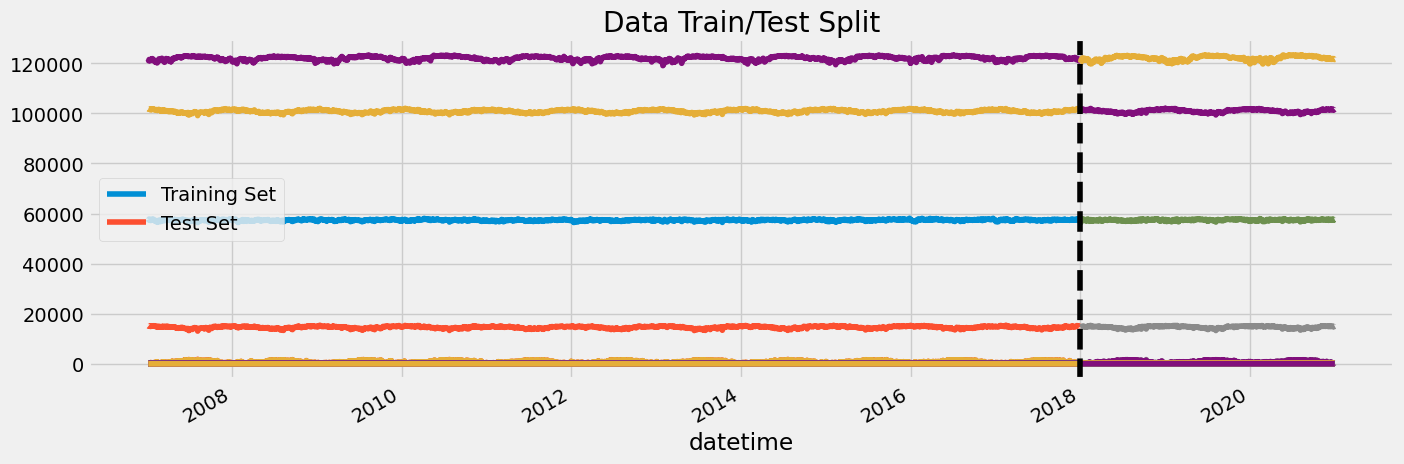

In [61]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [62]:
from sklearn.model_selection import TimeSeriesSplit
#test size 1 day*365 days*1 year
tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)
df = df.sort_index()

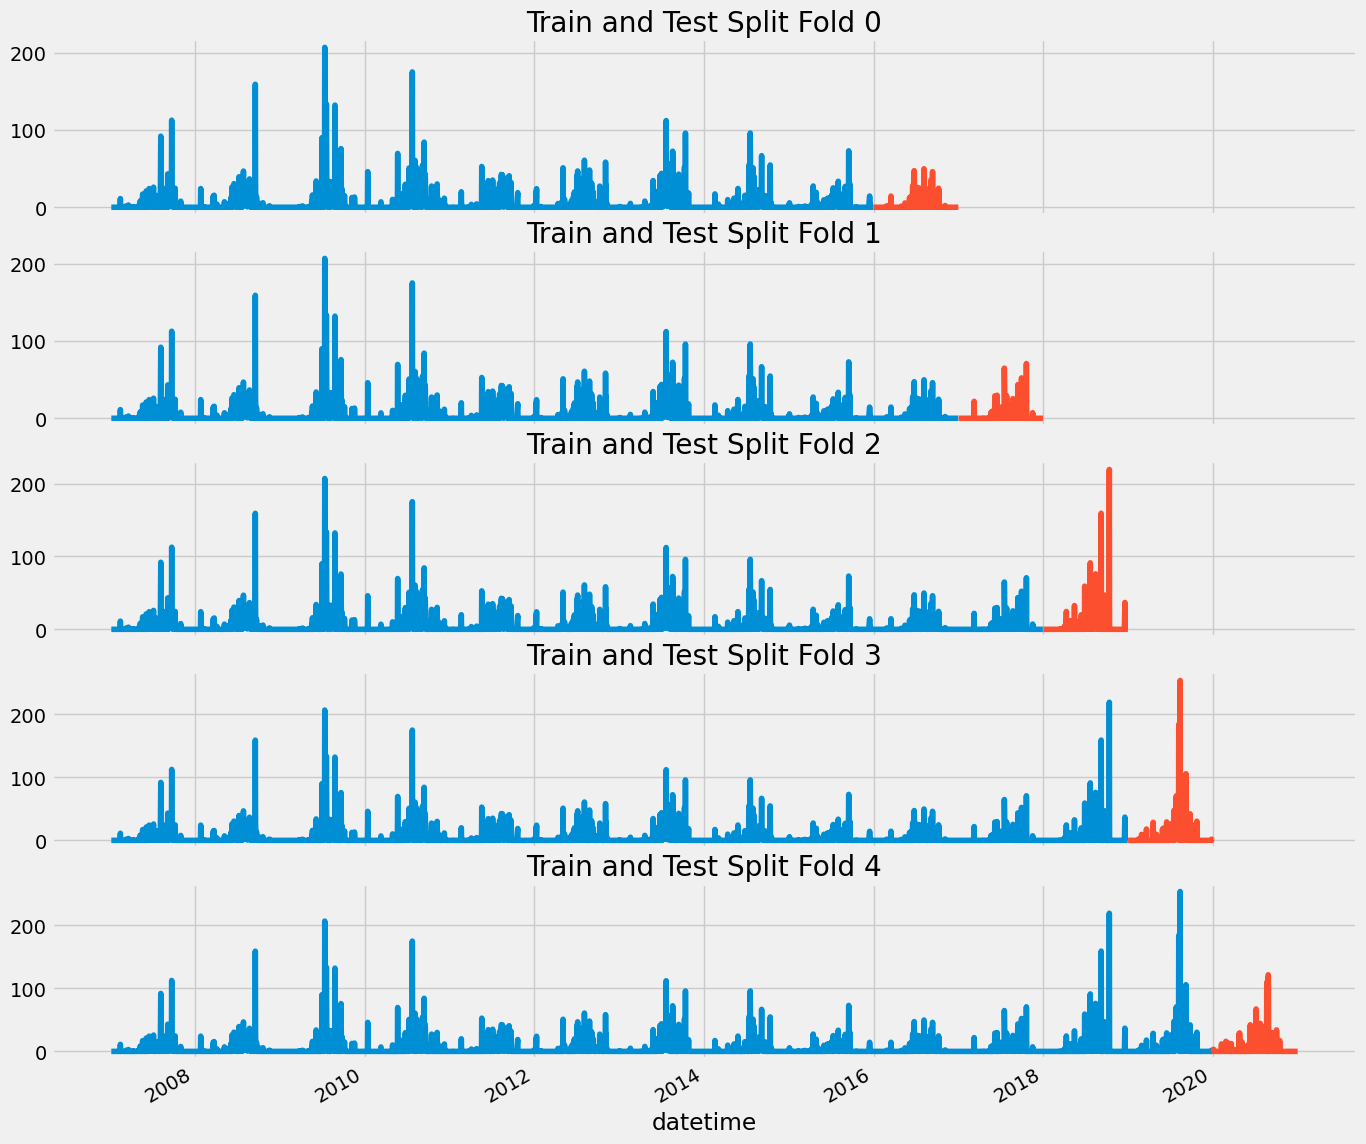

In [63]:
#time series cross validation
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['obs'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Train and Test Split Fold {fold}')
    test['obs'].plot(ax=axs[fold],
                         label='Test Set')
    #axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [64]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [65]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,pvar28,pvar29,pvar30,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,24.187777,3.949473,0.571053,5,1,1,2007,6,6,1
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,10.856130,-3.764291,0.242903,6,1,1,2007,7,7,1
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,0.199471,-6.309412,-0.131587,0,1,1,2007,8,8,2
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,-3.734798,-2.256974,-0.494028,1,1,1,2007,9,9,2
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,-1.539389,-0.943537,-0.272203,2,1,1,2007,10,10,2


In [66]:
df1['meanmod']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: meanmod, Length: 4998, dtype: float64

In [67]:
df['dayofmonth']

datetime
2007-01-06     6
2007-01-07     7
2007-01-08     8
2007-01-09     9
2007-01-10    10
              ..
2020-12-27    27
2020-12-28    28
2020-12-29    29
2020-12-30    30
2020-12-31    31
Name: dayofmonth, Length: 4998, dtype: int64

In [68]:
def add_lags(df):
    target_map = df['obs'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [69]:
df = add_lags(df)

In [70]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,5,1,1,2007,6,6,1,NaN,NaN,NaN
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,6,1,1,2007,7,7,1,NaN,NaN,NaN
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,0,1,1,2007,8,8,2,NaN,NaN,NaN
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,1,1,1,2007,9,9,2,NaN,NaN,NaN
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,2,1,1,2007,10,10,2,NaN,NaN,NaN


In [71]:
# tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)
# df = df.sort_index()


# fold = 0
# preds = []
# scores = []
# for train_idx, val_idx in tss.split(df):
#     train = df.iloc[train_idx]
#     test = df.iloc[val_idx]

#     train = create_features(train)
#     test = create_features(test)

#     FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month','year',
#                 'lag1','lag2','lag3','meanmod','stdmod']
#     TARGET = 'obs'

#     X_train = train[FEATURES]
#     y_train = train[TARGET]

#     X_test = test[FEATURES]
#     y_test = test[TARGET]

#     reg = xgb.XGBRegressor(base_score=0, booster='gbtree',    
#                            n_estimators=1000,
#                            early_stopping_rounds=50,
#                            objective='reg:linear',
#                            max_depth=3,
#                            learning_rate=0.04)
#     reg.fit(X_train, y_train,
#             eval_set=[(X_train, y_train), (X_test, y_test)],
#             verbose=100)

#     y_pred = reg.predict(X_test)
#     preds.append(y_pred)
#     score = np.sqrt(mean_squared_error(y_test, y_pred))
#     scores.append(score)

In [72]:
tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)
 
#     FEATURES = [
#                 'lag1','lag2','lag3','meanmod','stdmod','pvar1']
    FEATURES=['pvar17', 'pvar2', 'pvar12', 'dayofyear', 'pvar14', 'pvar23', 'pvar1', 'pvar24', 'meanmod', 'pvar8', 'pvar10', 'pvar4', 'pvar20', 'lag3', 'lag1']

    TARGET = 'obs'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.04)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:12.66459	validation_1-rmse:7.77439


/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[75]	validation_0-rmse:7.61811	validation_1-rmse:7.82632
[0]	validation_0-rmse:12.27827	validation_1-rmse:9.04163
[100]	validation_0-rmse:7.16350	validation_1-rmse:7.84939


/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[122]	validation_0-rmse:6.97034	validation_1-rmse:7.85853
[0]	validation_0-rmse:12.01524	validation_1-rmse:18.54612
[100]	validation_0-rmse:7.16095	validation_1-rmse:16.39275


/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:03:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[194]	validation_0-rmse:6.56828	validation_1-rmse:16.30520
[0]	validation_0-rmse:12.70734	validation_1-rmse:20.40839


/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:8.06414	validation_1-rmse:15.18908
[200]	validation_0-rmse:7.23301	validation_1-rmse:14.22846
[294]	validation_0-rmse:6.65758	validation_1-rmse:13.78872
[0]	validation_0-rmse:13.44482	validation_1-rmse:13.91706


/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:03:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[94]	validation_0-rmse:8.32580	validation_1-rmse:11.46717


In [73]:
scores

[6.6217110727952635,
 7.835739852527362,
 16.292618682124044,
 13.7600918540895,
 11.04097365345001]

In [74]:
print(f'mean square error across folds {np.mean(scores):0.4f}')
print(f'Fold mean square error:{scores}')

mean square error across folds 11.1102
Fold mean square error:[6.6217110727952635, 7.835739852527362, 16.292618682124044, 13.7600918540895, 11.04097365345001]


In [75]:
# # Retrain on all data
# df = create_features(df)

# FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year',
#             'lag1','lag2','lag3','meanmod','stdmod']
# TARGET = 'obs'

# X_all = df[FEATURES]
# y_all = df[TARGET]

# reg = xgb.XGBRegressor(base_score=0.5,
#                        booster='gbtree',    
#                        n_estimators=1000,
#                        objective='reg:linear',
#                        max_depth=5,
#                        learning_rate=0.04)
# reg.fit(X_all, y_all,
#         eval_set=[(X_all, y_all)],
#         verbose=100)


In [76]:
# Retrain on all data
df = create_features(df)

# FEATURES = [
#             'lag1','lag2','lag3','meanmod','stdmod']
FEATURES=['pvar17', 'pvar2', 'pvar12', 'dayofyear', 'pvar14', 'pvar23', 'pvar1', 'pvar24', 'meanmod', 'pvar8', 'pvar10', 'pvar4', 'pvar20', 'lag3', 'lag1']
TARGET = 'obs'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.04)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)


[0]	validation_0-rmse:13.28922


/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:03:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6.40798
[200]	validation_0-rmse:5.22788
[300]	validation_0-rmse:4.29617
[400]	validation_0-rmse:3.72492
[500]	validation_0-rmse:3.24920
[600]	validation_0-rmse:2.84634
[700]	validation_0-rmse:2.52084
[800]	validation_0-rmse:2.23705
[900]	validation_0-rmse:1.95584
[999]	validation_0-rmse:1.74181


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the entire dataset
y_pred_all = reg.predict(X_all)

# Calculate RMSE
rmse_all = np.sqrt(mean_squared_error(y_all, y_pred_all))
print("RMSE of retrained data:", rmse_all)


RMSE of retrained data: 1.7418100588757337


In [78]:
import xgboost as xgb

# Assuming 'reg' is your trained XGBoost model
# reg = xgb.XGBRegressor(...)  # or xgb.XGBClassifier(...) for classification

# Fit your XGBoost model on the training data

# After fitting the model, you can access feature importance scores
feature_importance = reg.feature_importances_

# Assuming 'FEATURES' contains the names of your features
# Print feature importance scores
for feature, importance in zip(FEATURES, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: pvar17, Importance: 0.12434367835521698
Feature: pvar2, Importance: 0.08853524178266525
Feature: pvar12, Importance: 0.05066129192709923
Feature: dayofyear, Importance: 0.08832953125238419
Feature: pvar14, Importance: 0.06642452627420425
Feature: pvar23, Importance: 0.07615666836500168
Feature: pvar1, Importance: 0.07023075968027115
Feature: pvar24, Importance: 0.05784391984343529
Feature: meanmod, Importance: 0.06303463131189346
Feature: pvar8, Importance: 0.06725919991731644
Feature: pvar10, Importance: 0.0469449907541275
Feature: pvar4, Importance: 0.04381490871310234
Feature: pvar20, Importance: 0.05420306697487831
Feature: lag3, Importance: 0.05142023786902428
Feature: lag1, Importance: 0.05079740658402443


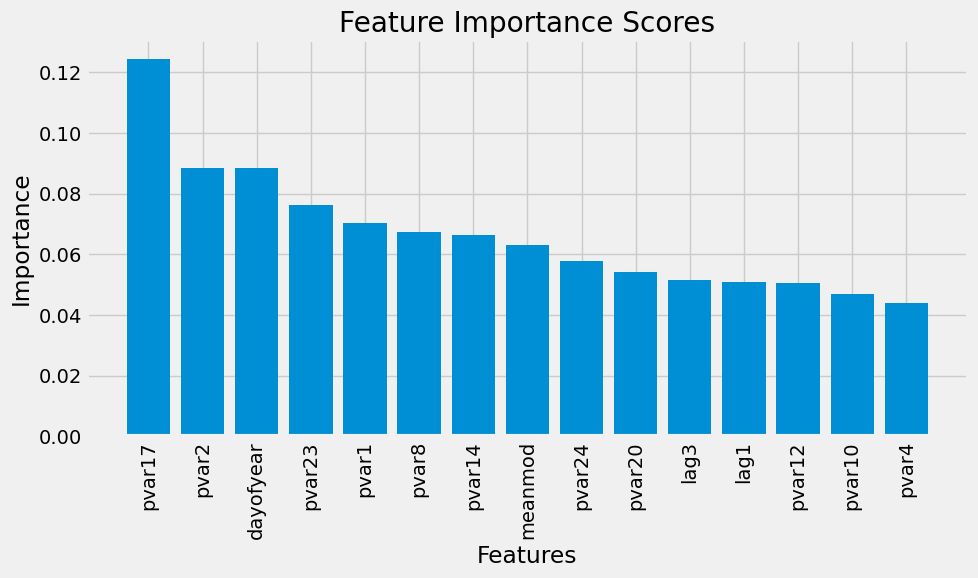

In [79]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance' contains the feature importance scores
# Assuming 'FEATURES' contains the names of your features

# Sort the feature importance scores and corresponding feature names
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = [FEATURES[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(FEATURES)), sorted_importance, align='center')
plt.xticks(range(len(FEATURES)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()


In [80]:
# Select the top 15 features
top_n = 15
selected_features = sorted_features[:top_n]

# Convert the selected features to a string variable
FEATURES = ", ".join(selected_features)

# Print the selected features
print("Selected Features:", FEATURES)


Selected Features: pvar17, pvar2, dayofyear, pvar23, pvar1, pvar8, pvar14, meanmod, pvar24, pvar20, lag3, lag1, pvar12, pvar10, pvar4


In [81]:
df.index.max()

Timestamp('2020-12-31 00:00:00')

In [82]:
df

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,5,1,1,2007,6,6,1,NaN,NaN,NaN
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,6,1,1,2007,7,7,1,NaN,NaN,NaN
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,0,1,1,2007,8,8,2,NaN,NaN,NaN
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,1,1,1,2007,9,9,2,NaN,NaN,NaN
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,2,1,1,2007,10,10,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,0.0,0.0,292.349579,0.0,-0.134501,-0.330605,0.0,-2.790000e-05,-3.370000e-06,...,6,4,12,2020,362,27,52,0.0,0.0,0.0
2020-12-28,0.0,0.0,0.0,292.926605,0.0,-0.558952,-0.205444,0.0,9.070000e-06,3.970000e-06,...,0,4,12,2020,363,28,53,0.0,0.0,0.0
2020-12-29,0.0,0.0,0.0,294.176666,0.0,-1.051628,0.059863,0.0,7.540000e-06,-7.450000e-06,...,1,4,12,2020,364,29,53,0.0,0.0,0.0


In [83]:
# Add predicted values as a new column to the DataFrame
df['predicted_data'] = y_pred_all

In [84]:
# Replace negative predicted values with zero
df['predicted_data'] =df['predicted_data'].clip(lower=0)
df['predicted_data'] = df['predicted_data'].clip(lower=0).round(2)


In [85]:
df

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,predicted_data
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,1,1,2007,6,6,1,NaN,NaN,NaN,0.00
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,1,1,2007,7,7,1,NaN,NaN,NaN,0.03
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,1,1,2007,8,8,2,NaN,NaN,NaN,0.00
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,1,1,2007,9,9,2,NaN,NaN,NaN,0.00
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,1,1,2007,10,10,2,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,0.0,0.0,292.349579,0.0,-0.134501,-0.330605,0.0,-2.790000e-05,-3.370000e-06,...,4,12,2020,362,27,52,0.0,0.0,0.0,0.00
2020-12-28,0.0,0.0,0.0,292.926605,0.0,-0.558952,-0.205444,0.0,9.070000e-06,3.970000e-06,...,4,12,2020,363,28,53,0.0,0.0,0.0,0.00
2020-12-29,0.0,0.0,0.0,294.176666,0.0,-1.051628,0.059863,0.0,7.540000e-06,-7.450000e-06,...,4,12,2020,364,29,53,0.0,0.0,0.0,0.00


In [86]:
from sklearn.metrics import r2_score

# Calculate bias
bias = np.mean(y_pred_all - y_all)

# Calculate standard deviation
std = np.std(y_pred_all - y_all)

# Calculate mean
mean = np.mean(y_pred_all)

# Calculate R-squared
r2 = r2_score(y_all, y_pred_all)

print("Bias:", bias)
print("Standard Deviation:", std)
print("Mean:", mean)
print("R-squared:", r2)


Bias: -0.0024658063236065496
Standard Deviation: 1.741808313506357
Mean: 4.0315156
R-squared: 0.9823315231948093


In [87]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_meanmod = np.sqrt(mean_squared_error(df['obs'], df['meanmod']))
r2_meanmod = r2_score(df['obs'], df['meanmod'])
bias_meanmod = np.mean(df['meanmod'] - df['obs'])
mean_meanmod = np.mean(df['meanmod'])

print("RMSE for meanmod:", rmse_meanmod)
print("R-squared for meanmod:", r2_meanmod)
print("Bias for meanmod:", bias_meanmod)
print("Mean for meanmod:", mean_meanmod)

mean_obs=np.mean(df['obs'])
print('obs mean',mean_obs)


RMSE for meanmod: 13.12605313978316
R-squared for meanmod: -0.0033809202487478096
Bias for meanmod: 1.213509403761507
Mean for meanmod: 5.247490996398558
obs mean 4.033981592637061


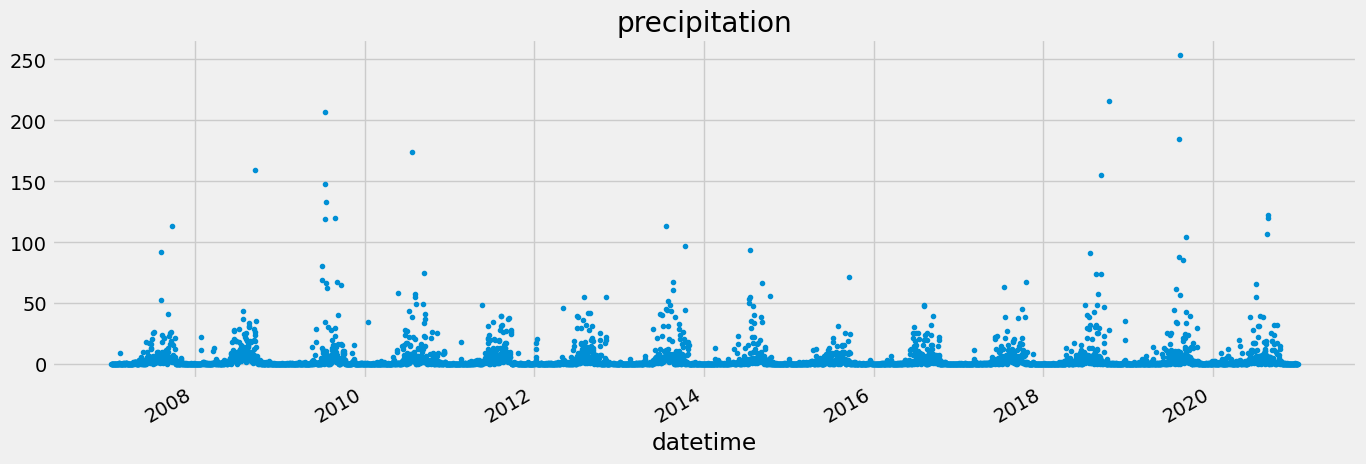

In [88]:
df['predicted_data'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

In [89]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid for tuning
# param_grid = {
#     'max_depth': [3],
    
#     'learning_rate': [0.01],
#     'n_estimators': [100, 500, 1000],
# }

# # Initialize TimeSeriesSplit
# tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)

# # Initialize lists to store predictions and scores
# preds = []
# scores = []

# # Iterate through each fold
# for fold, (train_idx, val_idx) in enumerate(tss.split(df)):
#     # Split data into training and validation sets
#     train = df.iloc[train_idx]
#     test = df.iloc[val_idx]

#     # Create features for training and validation sets
#     train = create_features(train)
#     test = create_features(test)

#     # Define features and target variable
#     FEATURES = ['lag1', 'lag2', 'lag3', 'meanmod', 'stdmod','dayofyear', 'dayofweek', 'quarter', 'month', 'year']
# for i in range(1, 31):
#     FEATURES.append('pvar{}'.format(i))
#     TARGET = 'obs'

#     # Extract features and target variable for training and validation sets
#     X_train = train[FEATURES]
#     y_train = train[TARGET]
#     X_test = test[FEATURES]
#     y_test = test[TARGET]

#     # Initialize XGBoost regressor
#     reg = xgb.XGBRegressor(base_score=0, booster='gbtree', objective='reg:linear')

#     # Perform grid search or randomized search for parameter tuning
#     grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     # Get the best estimator from the grid search
#     best_reg = grid_search.best_estimator_

#     # Fit the model with the best parameters
#     best_reg.fit(X_train, y_train,
#                  eval_set=[(X_train, y_train), (X_test, y_test)],
#                  verbose=100)

#     # Make predictions on the validation set
#     y_pred = best_reg.predict(X_test)
#     preds.append(y_pred)

#     # Calculate RMSE
#     score = np.sqrt(mean_squared_error(y_test, y_pred))
#     scores.append(score)

#     print("Fold:", fold+1, "RMSE:", score)

# # Calculate mean RMSE across all folds
# mean_rmse = np.mean(scores)
# print("Mean RMSE:", mean_rmse)


In [90]:
# # Extract the best parameters from the grid search
# best_params = grid_search.best_params_

# # Print the best parameters
# print("Best Parameters:")
# print(best_params)
